In [0]:
import pandas as pd

In [0]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,X,ID,Title,Desc,Area.Path,Category
0,1,28,450061,Re-apply workaround for Heating Station Functi...,Description:\r\nThe Stop Regulate command spor...,\GPS\NewGenSW\ArchDecomp\AS\DSS,0
1,2,33,450673,DSS has a to short timeout for the Plate Handl...,Descritpion:\r\nDSS has a to short timeout (18...,\GPS\NewGenSW\ArchDecomp\AS\DSS,0
2,3,88,458264,Timeout for ProcessHead back Teach is to short...,Timeout for ProcessHead back Teach is to short...,\GPS\NewGenSW\ArchDecomp\AS\DSS,0
3,4,124,464061,Sample Head Tip Handling Check in Operations -...,Description:\r\nThe Sample Head Tip Handling C...,\GPS\NewGenSW\ArchDecomp\AS\DSS,0
4,5,125,464062,Text of Sample Cell RunIn Loop description not...,Description: \r\nThe following text needs to b...,\GPS\NewGenSW\ArchDecomp\AS\DSS,0


In [0]:
df_new = pd.DataFrame()

In [0]:
df_new['desc'] = df.Desc

In [0]:
df_new['category'] = df.Category


In [0]:
X = df_new.desc
df_new.desc.head()

0    Description:\r\nThe Stop Regulate command spor...
1    Descritpion:\r\nDSS has a to short timeout (18...
2    Timeout for ProcessHead back Teach is to short...
3    Description:\r\nThe Sample Head Tip Handling C...
4    Description: \r\nThe following text needs to b...
Name: desc, dtype: object

In [0]:
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

#df_new.desc = df_new.desc.apply(lambda x: x.lower())
df_new.desc = df_new.desc.apply(lambda x: re.sub("[!@#$+%*:()'-]", ' ', x))
#print(df_new.desc.head())
df_new.desc = df_new.desc.apply(lambda x:[word for word in x.split() if word not in stop_words])
#print(df_new.desc.head())

In [0]:
df_new['desc'] = df_new['desc'].apply(' '.join)
df_new['desc'].head()

0    Description The Stop Regulate command sporadic...
1    Descritpion DSS short timeout 180sec Plate Han...
2    Timeout ProcessHead back Teach short DSS Proce...
3    Description The Sample Head Tip Handling Check...
4    Description The following text needs removed S...
Name: desc, dtype: object

In [0]:
#import keras
#from keras.preprocessing.text import Tokenizer
# The maximum number of words to be used. (most frequent)
#MAX_NB_WORDS = 5000000
# Max number of words in each issue.
#MAX_SEQUENCE_LENGTH = 250
# This is fixed.
#EMBEDDING_DIM = 100
#tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts(df_new['desc'].values)
#word_index = tokenizer.word_index
#print('Found %s unique tokens.' % len(word_index))
#####Found 8800 unique tokens.

In [0]:
#print(df_new.desc[1])
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
#lemmatizer.lemmatize("bats")

#df_new.desc = df_new.desc.apply(lambda x1: ''.join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x1)]))
print(df_new.desc.head())


#df_new.desc = df_new.desc.apply(lambda x:[word for word in nltk.word_tokenize(x)])

df_new.desc = df_new.desc.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))  ## after applying this tokens: 8500




0    Description The Stop Regulate command sporadic...
1    Descritpion DSS short timeout 180sec Plate Han...
2    Timeout ProcessHead back Teach short DSS Proce...
3    Description The Sample Head Tip Handling Check...
4    Description The following text needs removed S...
Name: desc, dtype: object


In [0]:
df_new.desc.head()

0    Description The Stop Regulate command sporadic...
1    Descritpion DSS short timeout 180sec Plate Han...
2    Timeout ProcessHead back Teach short DSS Proce...
3    Description The Sample Head Tip Handling Check...
4    Description The following text need removed Sa...
Name: desc, dtype: object

In [0]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')
df_new.desc = df_new.desc.apply(lambda x: tokenizer.tokenize(x))

In [0]:
df_new.desc.head()

0    [Description, The, Stop, Regulate, command, sp...
1    [Descritpion, DSS, short, timeout, 180sec, Pla...
2    [Timeout, ProcessHead, back, Teach, short, DSS...
3    [Description, The, Sample, Head, Tip, Handling...
4    [Description, The, following, text, need, remo...
Name: desc, dtype: object

In [0]:
import keras
from keras.preprocessing.text import Tokenizer
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each issue.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
#tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_new['desc'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 8257 unique tokens.


In [0]:
#print(df_new.desc[4])
#from nltk.stem import PorterStemmer
#porter = PorterStemmer()
#word_list = df_new.desc[4]
#word_list1 = nltk.word_tokenize(word_list)
#print(word_list1)
#lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list1])
#stemmed_output = ' '.join([porter.stem(w) for w in word_list1])
#print(lemmatized_output)
#stemmed_output


In [0]:
from keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(df_new['desc'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)


Shape of data tensor: (846, 250)


In [0]:
Y = pd.get_dummies(df_new['category']).values
print('Shape of label tensor:', Y.shape)
print(type(Y))
print(Y[500])

Shape of label tensor: (846, 4)
<class 'numpy.ndarray'>
[0 0 1 0]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(676, 250) (676, 4)
(170, 250) (170, 4)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
model = Sequential()
model.add(Embedding(8258, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 250, 100)          825800    
_________________________________________________________________
spatial_dropout1d_8 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 404       
Total params: 906,604
Trainable params: 906,604
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
from keras.callbacks import EarlyStopping
epochs = 20
batch_size = 50

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 608 samples, validate on 68 samples
Epoch 1/20
608/608 [==============================] - 12s 19ms/step - loss: 1.3820 - acc: 0.3158 - val_loss: 1.3774 - val_acc: 0.3676
Epoch 2/20
608/608 [==============================] - 8s 13ms/step - loss: 1.3122 - acc: 0.4901 - val_loss: 1.2856 - val_acc: 0.4118
Epoch 3/20
608/608 [==============================] - 8s 13ms/step - loss: 1.1641 - acc: 0.5066 - val_loss: 1.1086 - val_acc: 0.4706
Epoch 4/20
608/608 [==============================] - 8s 13ms/step - loss: 0.9040 - acc: 0.5855 - val_loss: 0.9454 - val_acc: 0.5294
Epoch 5/20
608/608 [==============================] - 8s 13ms/step - loss: 0.7636 - acc: 0.6809 - val_loss: 0.9035 - val_acc: 0.6029
Epoch 6/20
608/608 [==============================] - 8s 13ms/step - loss: 0.6701 - acc: 0.7911 - val_loss: 0.7556 - val_acc: 0.6471
Epoch 7/20
608/608 [==============================] - 8s 14ms/step - loss: 0.4764 - acc: 0.8536 - val_loss: 0.5684 - val_acc: 0.7500
Epoch 8/20
608/608 [===

In [0]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

170/170 [==============================] - 0s 2ms/step
Test set
  Loss: 0.529
  Accuracy: 0.794


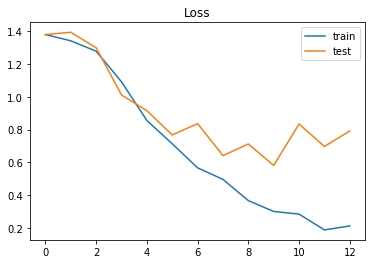

In [0]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [0]:
#https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

In [0]:
#https://github.com/susanli2016/NLP-with-Python/blob/master/Multi-Class%20Text%20Classification%20LSTM%20Consumer%20complaints.ipynb